&copy; Copyright 2016 Dr Marta Milo, University of Sheffield. 


# Week 3 Practical - Solutions


This Notebook contains the solution of the practical assignments for Week 3. 

The solution to the exercises assigned but they are not unique. All the exercises proposed can be solved in different manners, some more eficient than other but still correct is the requested output is obtained. 


For this reason, when you compare your solutions with these bear in mind that you might have found the solution using a different algorithm and different commands, nonethless they are still correct. These solutions are a guidance and also a surce of ideas that can be merged with yours to build your scripts and to improve it.


To help you to evaluate your notebooks please follow the following criteria:

* Overall clarity (score = 0.25)
* Correctness of the code (score = 0.25)
* Exhaustive cover of required analysis (score= 0.25) 
* Interpretation of the results (score = 0.25)

These criteria are used when peer-marking and self-marking. Please read the guidelines given to quantify the above criteria with a grade. Make sure that you score interpretation with a full mark if it is exhaustive and clear.


## Accessing the data


### Comma or tab delimited files


**Exercise 1**: Explore the command `read.table()` in R help. In a markdown cell give example of the use of this command for `.csv` and `.txt` files.


In [2]:
?read.table()

Example for `.csv` files:
`read.csv(file, header=TRUE, sep=",", fill=TRUE)`

Some times you want also to disable any quotes in the file that you read. This is done with using `quote = ""` within the parameters of the function.

Example for `.txt` files space delimited:
`read.delim(file, header=TRUE, sep=" ", fill=TRUE)`

Example for `.txt` files tab delimited:
`read.delim(file, header=TRUE, sep="\t", fill=TRUE)`

 **Exercise 2**: Load the data contained in the file smokers.csv and explore. Check what is its structure, using the command `str()` and explain in a markdown cell what you have found and if there are problems with missing data. 

In [3]:
data<-read.csv("data_wk3/smokers.csv", header=TRUE)
str(data)
data

'data.frame':	19 obs. of  2 variables:
 $ Smokers..mmHg.    : num  103 114 125 118 119 128 110 98 125 134 ...
 $ Non.smokers..mmHg.: Factor w/ 14 levels "","101","102",..: 6 2 4 11 2 12 7 12 5 8 ...


Smokers..mmHg. Non.smokers..mmHg.
1  1.03000e+02    107               
2  1.14000e+02    101               
3  1.25000e+02    103               
4  1.18000e+02    95                
5  1.19000e+02    101               
6  1.28000e+02    98                
7  1.10000e+02    112               
8  9.80000e+01    98                
9  1.25000e+02    106               
10 1.34000e+02    113               
11 1.11000e+02    102               
12 1.14000e+02    114               
13 1.15000e+02    101               
14 1.12000e+02    94                
15          NA                      
16          NA                      
17          NA                      
18 3.05975e-04    equal             
19 3.89071e-04    unequal

From the information that `str()` give on the object `data`, it is stated that `data` is composed of two variables with 19 observations. there is no information on NA (not applicable) values) and because of the different types of observations within column 2, it is not considered numeric.
We can use `is.na(data[,1])` and `is.na(data[,2])` to check for NA values and also use other parameters within `read.csv()` to avoid to generate factors taht are difficult to manipulate.


In [9]:
is.na(data[,1])
is.na(data[,2])

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE

We can see that there are NA values that we need to remove.

### Cleaning the data

Once we have loaded the data we want to make sure that all values have the type that we expect. We also have Excel's calculations for the t-tests -- both of which we don't need. It is traditional in data analysis for data cleansing to be a rather complex step. 

**Exercise 3**:In the `smokers` data the strings **equal** and **unequal** in column 2  create problems when R converts the data into a data.frame. What problems they create? Suggest ways of coping with this problem, without altering the dimensions of the the `data.frame`, to ensure that column 2 is considered numeric. (**TIP**: Our solution was to avoid the problem when reading the file. Explore `read.csv()` for futher information on this).



In [4]:
data1=read.csv("data_wk3/smokers.csv", header=TRUE, stringsAsFactors=FALSE)
str(data1)
data1

'data.frame':	19 obs. of  2 variables:
 $ Smokers..mmHg.    : num  103 114 125 118 119 128 110 98 125 134 ...
 $ Non.smokers..mmHg.: chr  "107" "101" "103" "95" ...


Smokers..mmHg. Non.smokers..mmHg.
1  1.03000e+02    107               
2  1.14000e+02    101               
3  1.25000e+02    103               
4  1.18000e+02    95                
5  1.19000e+02    101               
6  1.28000e+02    98                
7  1.10000e+02    112               
8  9.80000e+01    98                
9  1.25000e+02    106               
10 1.34000e+02    113               
11 1.11000e+02    102               
12 1.14000e+02    114               
13 1.15000e+02    101               
14 1.12000e+02    94                
15          NA                      
16          NA                      
17          NA                      
18 3.05975e-04    equal             
19 3.89071e-04    unequal

**Exercise 4**: Create a data.frame from smokers data with NA values and numerical data. Exclude the rows that are calculations from an Excel file (Could they be the last two rows?). Write the data in the directory `data_wk3` in a .csv file called "smokers_clean.csv".



In [5]:
write.csv(data1[1:17,],file="data_wk3/smokers_clean.csv",row.names=FALSE)
data2<-read.csv("data_wk3/smokers_clean.csv")
data2

Smokers..mmHg. Non.smokers..mmHg.
1  103            107               
2  114            101               
3  125            103               
4  118             95               
5  119            101               
6  128             98               
7  110            112               
8   98             98               
9  125            106               
10 134            113               
11 111            102               
12 114            114               
13 115            101               
14 112             94               
15  NA             NA               
16  NA             NA               
17  NA             NA

I picked out the rows 1-17 to write in order to remove the calculation data. In addition, I added `row.names=TRUE` to keep track of row names. These can be changed in something more meaningful. 
If the second col has empty we need to remove them before calculting the mean, it would not happen if you write the data frame and then read it again to upload the data in your workspace. 


### Missing Data

Often in a data set we have missing values, expressed within R as `NA` entries. NA stands for 'Not Available' and means that data is missing. In this context, if we were looking at an Excel file the corresponding cells in the Excel spreadsheet would be empty. These entries can cause problems with R functions and commands. We can tell R to exclude missing values with the parameter `na.rm`, in functions such as `mean()`.

**Exercise 5**: In the cleaned smoker data ( from *Exercise 4*) analyse the problem of missing values by calculating descriptive statistics of the data with and without missing values. Visualise the data in the way that is more appropriate to highlight the problem. Explain your choices in a markdown cell. Evaluate if there is a significant difference beetween smokers and non-smokers with a t-test. Plot results.

Mean with NA removed Mean with NA=0
Smokers     116.1429             95.64706      
Non-smokers 103.2143             85.00000

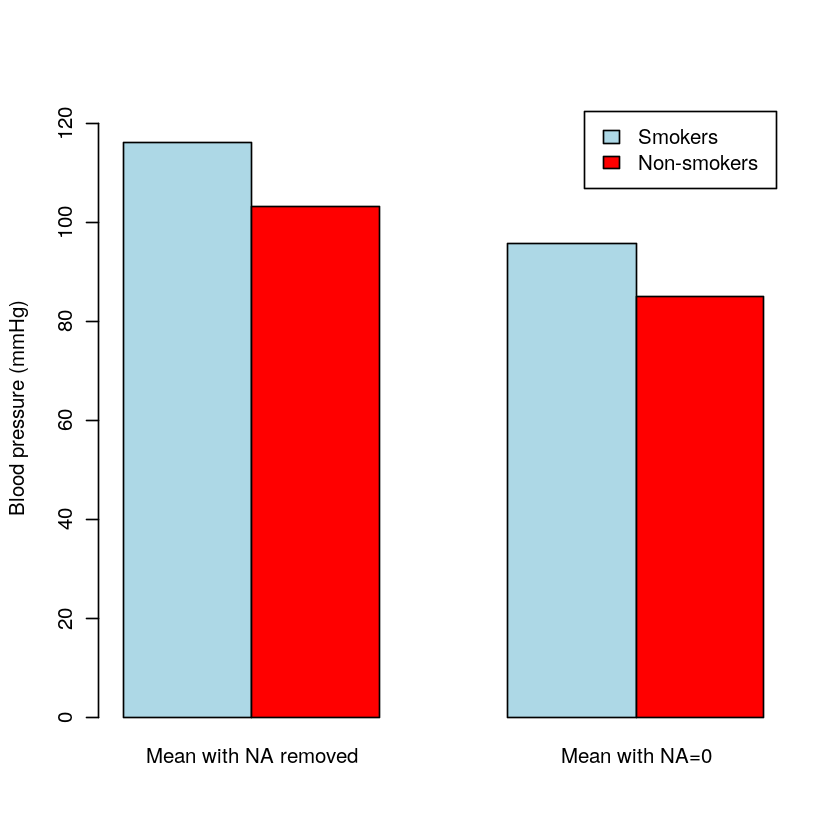

In [6]:
mean1<-mean(data2[,1],na.rm=TRUE)
mean2<-mean(data2[,2],na.rm=TRUE)

data3<-data2
data3[is.na(data3)]=0
mean3<-mean(data3[,1])
mean4<-mean(data3[,2])

mean_total<-c(mean1, mean2, mean3, mean4)
plotmean<-matrix(mean_total, nrow=2, ncol=2)
colnames(plotmean)=c("Mean with NA removed", "Mean with NA=0")
rownames(plotmean)=c("Smokers", "Non-smokers")
plotmean

barplot(plotmean, beside=TRUE, ylim=c(0,125), legend=c("Smokers","Non-smokers"), ylab="Blood pressure (mmHg)", 
        col=c("lightblue","red"))

The barplot of the means (smokers and non-smokers) for the data with NA removed and the data with NA=0, shows that when the NA are removed the means are smaller than the ones with NA considered as zero. This is because it counts in the sample size. This proves that it is important to remove the NA from the data because it could potentially skew it to be more widely dispersed, which the next graph, a box plot, will illustrate.

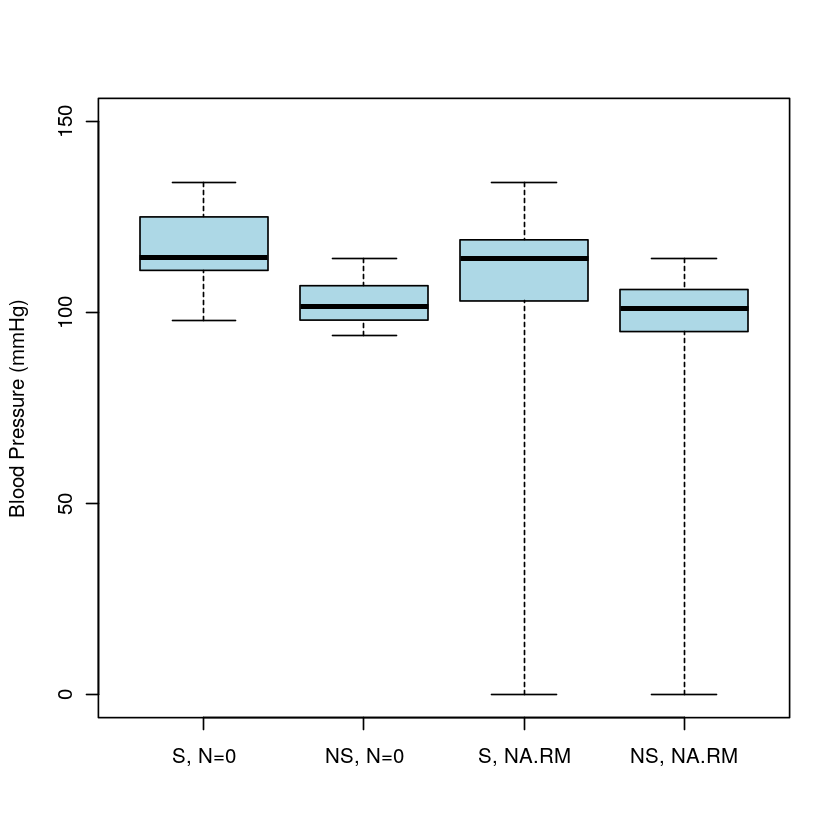

In [6]:
boxplot(data2[,1],data2[,2],data3[,1],data3[,2], ylim=c(0,150),range=0,
        col="light blue",ylab="Blood Pressure (mmHg)", names=c("S, N=0", "NS, N=0", "S, NA.RM", "NS, NA.RM"))

The box plot, in which the range is set to 0, causing whiskers to extend to the most extreme values. This is for including outliers in teh plots. Clearly the data sets with missing data is more dispersed, with minimum outliers of 0. The missing values does not implicate the median value as much, however, since it is base on the rank order instead of the average.

In [7]:
t.test(data2[,1],data2[,2])
t.test(data3[,1],data3[,2])


	Welch Two Sample t-test

data:  data2[, 1] and data2[, 2]
t = 4.1621, df = 22.546, p-value = 0.0003891
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  6.495648 19.361495
sample estimates:
mean of x mean of y 
 116.1429  103.2143 



	Welch Two Sample t-test

data:  data3[, 1] and data3[, 2]
t = 0.70864, df = 31.505, p-value = 0.4838
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19.97615  41.27027
sample estimates:
mean of x mean of y 
 95.64706  85.00000 


The test is evaluating the significance between the blood pressure of smokers vs non-smokers using a t-test with Welch's correction. The data set with missing values as 0 had a p-value of 0.48, while the data set with missing values removed had a p-value of 0.0004. Clearly, removing missing values resulted in a statistically significant difference. Therefore, the implications of missing values on statistical significance can be quite massive.

### Exponential and Log manipulations. 
In R we can use the the command `exp(x)` for computing $e^x$ and `log10(x),log2(x),logb(x, base=b)` to compute $log_{10}(x)$,  $log_2(x)$  or $log_b(x)$.

**Exercice 6**:
Using the clean smokers data take the $log_2$ of the data and compare the density distribution of the data with or without the log transformation. Plot the densities on the the same plot using the command `lines()`. Explain in a markdown cell what you can derive.

In [9]:
colnames(data3)<-c("Smokers (mmHg)", "Non-smokers (mmHg)")
data4<-log2(data3[1:14,]) # we need to remove the NA
data4

Smokers (mmHg) Non-smokers (mmHg)
1  6.686501       6.741467          
2  6.832890       6.658211          
3  6.965784       6.686501          
4  6.882643       6.569856          
5  6.894818       6.658211          
6  7.000000       6.614710          
7  6.781360       6.807355          
8  6.614710       6.614710          
9  6.965784       6.727920          
10 7.066089       6.820179          
11 6.794416       6.672425          
12 6.832890       6.832890          
13 6.845490       6.658211          
14 6.807355       6.554589

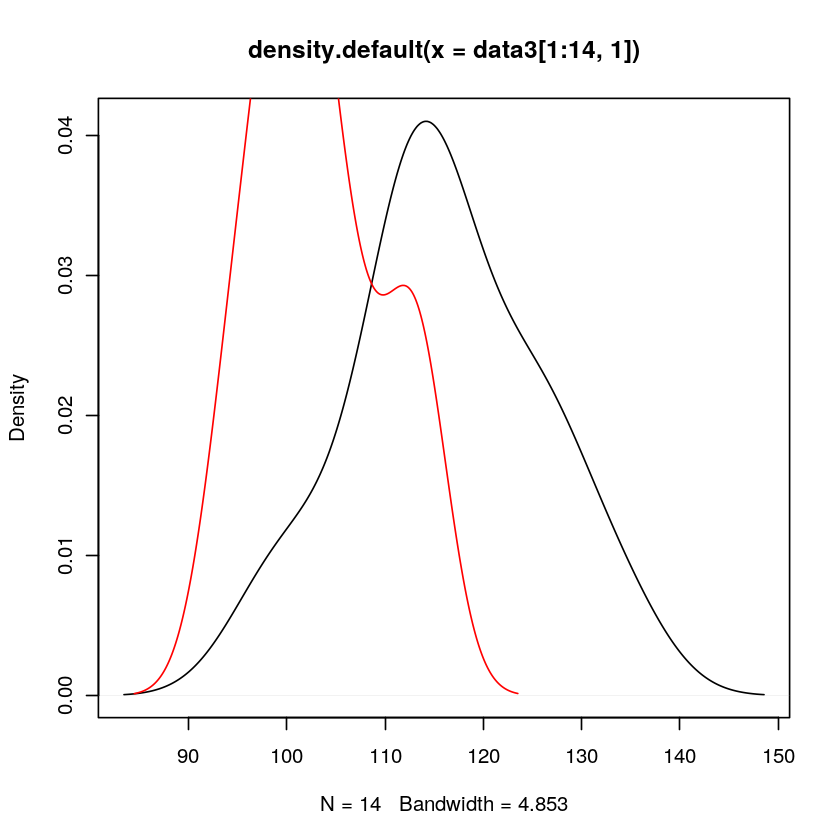

In [14]:
plot(density(data3[1:14,1]))
lines(density(data3[1:14,2]), col="red")

To visualise the density distribution of the original data vs log2-transformed data, we need to adjust the ranges of the plot since the values are on different scales. A solution for this can be:  

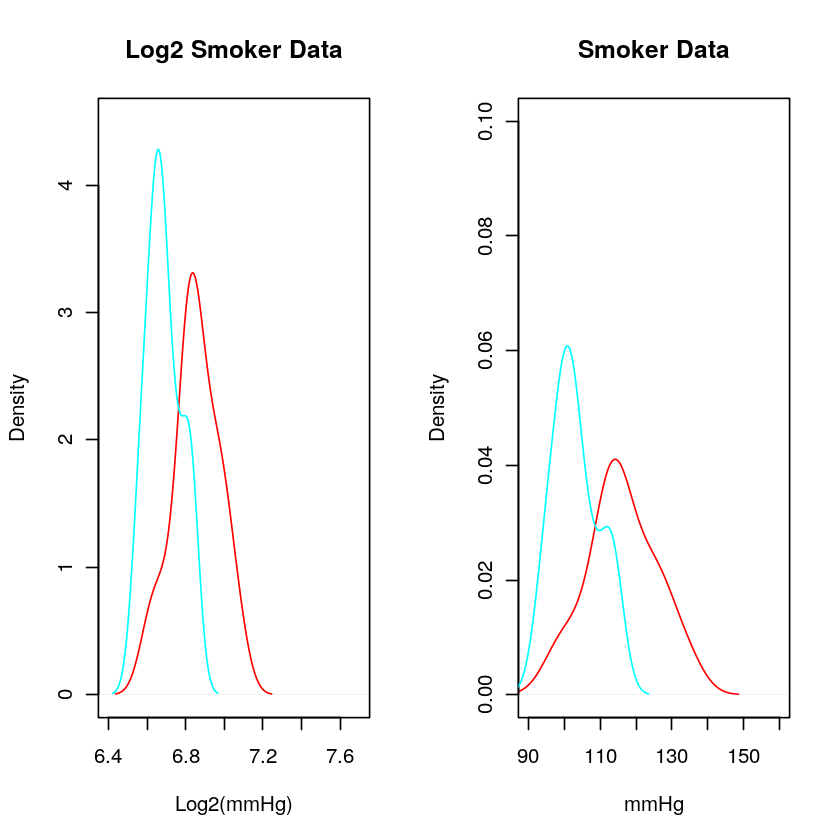

In [34]:
par(mfrow=c(1,2))
plot(density(data4[,1]), col=234, main= "Log2 Smoker Data", xlab="Log2(mmHg)", xlim=c(6.4,7.7), ylim=c(0,4.5))
lines(density(data4[,2]), col=213)


plot(density(data3[1:14,1]), col=234, main= "Smoker Data", xlab="mmHg", xlim=c(90,160), ylim=c(0,0.1))
lines(density(data3[1:14,2]), col=213)

The plots are showing that, although on different scales, the density distributions of both datasets are the same. Therefore, it can be concluded that log-transformation does not alter the density distribution of the original data and allows comparisons with other datasets by normalising scale and order of magnitude of teh values.


**Exercise 7**: Build a MA plot of the smoker data using the above formulae. Enrich the plot with labels and colors and In a markdown cell explain why M represents the fold change between samples and A the over signal.  

We can use a function to solve this exercise: 

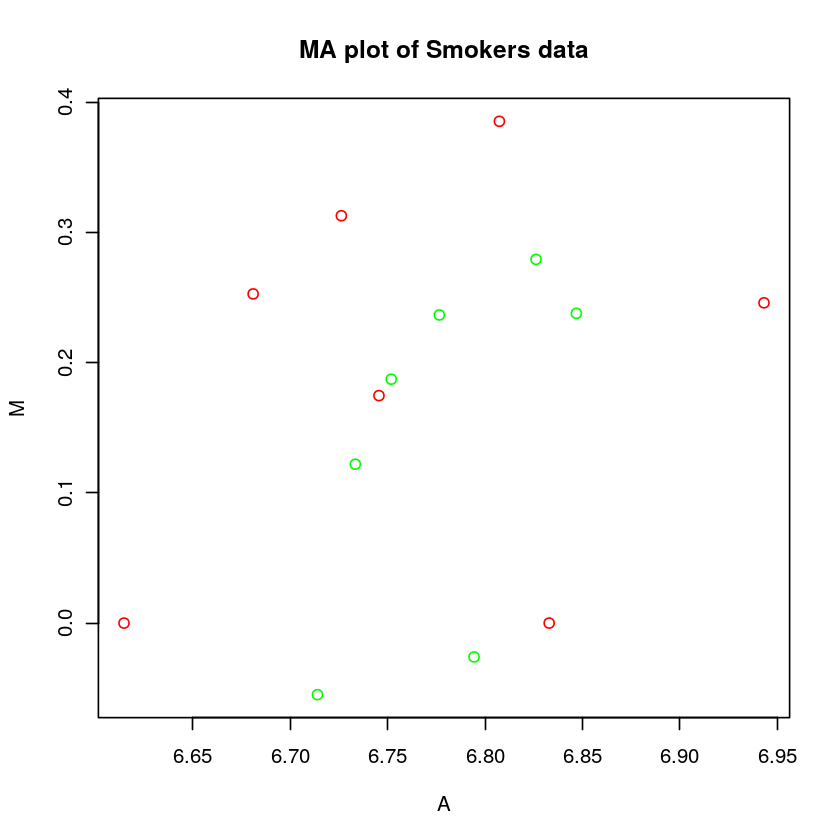

In [35]:
x<-data3[1:14,1]
y<-data3[1:14,2]
MA<-function(x,y){
    M<-log2(x)-log2(y)
    A<-0.5*(log2(x)+log2(y))
    plot(A, M, xlab="A", ylab="M", main="MA plot of Smokers data", col=c("green", "red"))
}

MA(x,y)

M represents the fold change between samples because `logb(x)-logb(y) = logb(x/y)`, effectively converting it into a ratio.

A is the average log-signal intensity because `(logb(x)+logb(y))/2` is simply the average between log(x) and log(y). 


### For Loops and conditional statements


In [ ]:
mydata<-rnorm(100,mean=0,sd=1)
mydata2<-rnorm(100,mean=2,sd=1)

par(mfrow=c(2, 2))
for(i in 1:2){
    hist(mydata,col='red', prob=TRUE)
    lines(density(mydata), pch=3, lty=i, col="blue")
    hist(mydata2,col='red',prob=TRUE)
    lines(density(mydata2), pch=3, lty=i, col="blue")
    #title(main=paste("lty = ",i), col.main="blue")
}

**Exercise 8**: Use a for loop to plot the smokers data as shown in the example above, with and without the log transformation. 

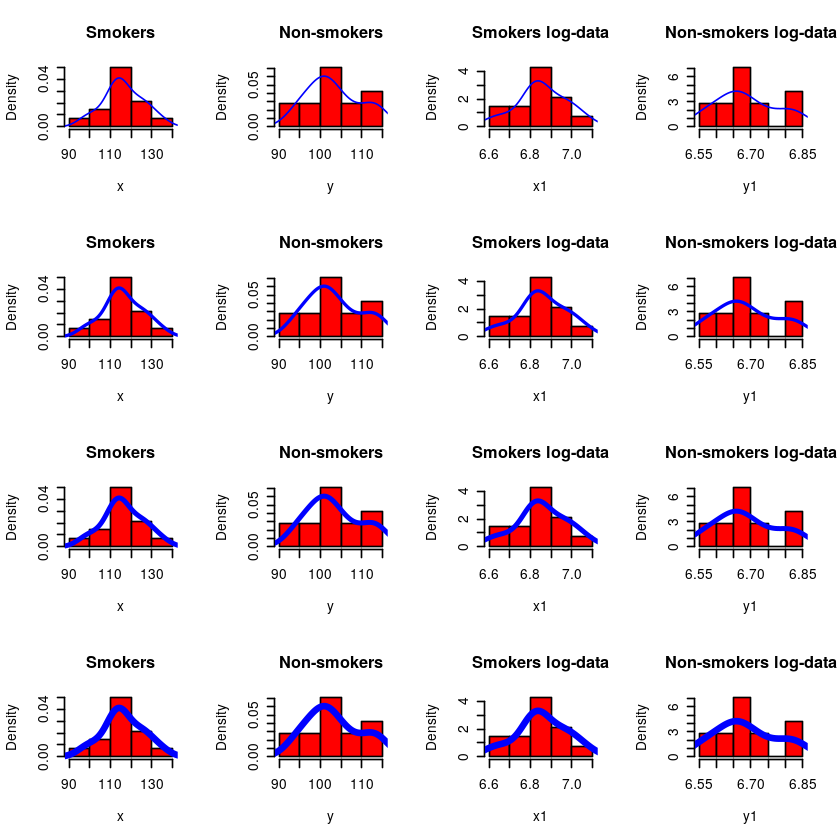

In [39]:
x1<-data4[,1]
y1<-data4[,2]

par(mfrow=c(4, 4))
for(i in 1:4){
    hist(x,col='red', prob=TRUE, main="Smokers")
    lines(density(x), pch=3, lwd=i, col="blue")
    hist(y,col='red',prob=TRUE, main="Non-smokers")
    lines(density(y), pch=3, lwd=i, col="blue")
    hist(x1,col='red', prob=TRUE, main="Smokers log-data")
    lines(density(x1), pch=3, lwd=i, col="blue")
    hist(y1,col='red',prob=TRUE, main="Non-smokers log-data")
    lines(density(y1), pch=3, lwd=i, col="blue")
}

### Real data case study
In this section we will analyse data collected from qPCR on single cell gene expression. The data is saved in a file called `"Ct_data.csv"` saved in `data_wk9` folder. The data are stored in a table of 384 rows and 3 columns, representing 384 qPCR reactions in  3 different runs. 
The genes that are quantified with qPCR are grouped in three different clusters of 8 genes (24 genes in total) and each run analyses one group of genes. In each colum (experiment) every 8 rows the same markers repeat, but the samples in which they are tested are different, they are products from different cells (experiments). The target names are stored in a file called `"targetNames.csv"`.

The number of clusters that are repeated each column is equal to 48. These are the cells that have been analysed, each cell is considered an independent experiment.

In summary we have full data stored in a [384x3] and we want to build a data structure which is a matrix of [24x48], i.e the 24 different genes analysed and the 48 cells (experiments) that we performed. 


**Exercise 9**: Write a workflow and its associated pipeline for the analysis of this data, including the intital reorganisation of the data, the diagnostics and the analysis to describe the data and saving results with column and row names.


***Workflow***

Reorganise data -> Transform data ->Analyse data-> Save results 

***Pipeline***

Reorganise data: changing the data structure from a [384 x 3] matrix into a [24 x 48] matrix. Each row of the new matrix corresponds to a gene analysed, while each column represents the data collected from each experiment run (e.g. experiments on different genes in a different cell type). 

Transform data: gene expression data is obtained by subtracting the background (RNA SPIKE), and using $2^{-deltaCt}$. However, in order to mantain the scale within same order of magnitude, we keep the log-form of the data. 

Analyse data: compare the distribution of gene expression data in the 48 experiments using boxplots and density distribution curves. Pick out any visible outliers, and generate conjectures of cell function/behaviour based on these analyses.

Save results: results are saved with appropriate column and row names. Column names are the number of experiment run (1-48), while the row names are the names of gene analysed. 

**Exercise 10:** Analyse the single cell qPCR data following your workflow. Ensure that you explain in a markdown your analysis and plot the diagnostics as well as the analysis on the transformed data. You might want to use any visulaisation tool that you feel is appropriate for better explaining this data.

In [41]:
Ct_data <- read.csv("data_wk3/Ct_data.csv", header=TRUE)
i<-1
j<-1
k<-1

Ct<-matrix(0,nrow=8,ncol=48)
Ct_full<-matrix(0,nrow=24,ncol=48)
cell_number<-dim(Ct_data)[1]
step<-c(1,9,17)

for (k in 1:3){
    while (i<= (cell_number)) {
        Ct[,j]<-Ct_data[i:(i+7),k]
        i<-i+8
        j<-j+1
        }
    Ct_full[step[k]:(step[k]+7),]=Ct
    i<-1
    j<-1
}

targetNames<-read.csv("data_wk3/targetNames.csv", header=TRUE, stringsAsFactors=FALSE)
full_target<-c(targetNames[1:8,1],targetNames[1:8,2],targetNames[1:8,3])
rownames(Ct_full)<-full_target

Ct_full

write.csv(Ct_full, file="data_wk3/Ct_full.csv")

[,1]   [,2]   [,3]   [,4]   [,5]   [,6]   [,7]   [,8]   [,9]  
RNA SPIKE       40.000 18.903 18.622 21.938 14.487 18.780 35.385 17.439 18.148
B-ACTIN         10.689 40.000 27.852 40.000 33.368 26.049 27.076 27.088 29.750
PAX2            26.276 23.597 21.913 28.105 20.244 19.911 40.000 20.699 20.676
PAX8            14.877 22.536 21.913 22.079 18.031 21.211 26.394 20.067 21.729
FOXG1           23.972 23.239 25.456 23.322 24.934 28.429 20.383 23.619 23.197
DLX5            13.871 11.345 25.412 40.000 32.118 40.000 20.552 15.233 40.000
GFP             32.987 28.168 40.000 40.000 30.817 18.850 32.173 40.000 34.128
RPLPO           24.659 22.507 17.877 27.677 22.238 20.576 28.942 20.832 21.962
OCT3-4          18.010 15.492 13.154 17.142 13.021 15.697 23.152 21.132 14.220
PAX6            14.455 40.000 40.000 16.928 13.766 40.000 15.438 12.008 14.939
BRN3A           13.791 18.811 19.899 15.298 15.464 25.094 15.315 12.849 16.128
NESTIN          20.407 21.954 26.150 19.844 23.908 20.792 17.461 21.345 21.022
SIX1            22.347 27.539 19.578 24.323 22.653 22.509 22.921 20.932 40.000
GATA3           19.857 18.919 25.792 18.642 19.464 21.133 16.613 19.413 19.377
RNA SPIKE H10_1 18.636 22.384 24.537 20.167 19.651 22.306 13.703 20.667 22.811
NANOG           40.000 14.979 15.436 13.104 40.000 40.000 22.816 23.050 22.017
SOX2            23.684 23.371 25.924 25.800 22.965 22.675 21.714 20.791 23.796
ATOH1           21.211 18.621 20.260 19.172 26.221 21.263 24.987 19.758 19.434
BRN3C           21.652 21.903 19.860 19.676 20.235 16.916 20.947 18.828 19.045
MYOSIN7A        26.446 29.702 26.397 25.000 23.348 25.444 25.163 23.744 24.689
SOX9            22.231 27.370 25.362 23.793 23.357 25.282 23.193 21.901 24.775
SYP             23.965 28.319 32.671 24.078 24.565 24.121 23.685 25.283 28.538
RNA SPIKE H10   20.707 40.000 22.742 20.641 17.126 40.000 19.219 21.213 22.882
MEIS1           32.147 40.000 11.149 28.568 27.460  9.694 40.000 40.000 13.366
                [,10]  [,11] [,12]  [,13]  [,14]  [,15]  [,16]  [,17]  [,18] 
RNA SPIKE       28.215 ⋯     17.397 40.000 17.631 16.855 23.725 19.249 18.698
B-ACTIN         22.186 ⋯     27.204 40.000 31.061 31.027  8.650 28.800 26.691
PAX2            22.411 ⋯     21.741 25.830 20.790 23.270 26.432 20.766 22.742
PAX8            20.114 ⋯     23.095 21.986 40.000 20.641 24.193 19.068 20.692
FOXG1           23.594 ⋯     22.909 21.605 21.686 24.928 20.668 22.407 24.750
DLX5            40.000 ⋯     37.773  8.485 31.421 22.094 23.196 25.677 11.169
GFP             40.000 ⋯     24.838 40.000 23.742 40.000 29.212 24.434 22.176
RPLPO           24.549 ⋯     21.867 23.759 21.275 21.925 20.873 21.275 27.176
OCT3-4          20.462 ⋯     15.750 16.787 21.664 22.104 22.583 13.774 14.961
PAX6            21.699 ⋯     16.115 14.482 22.274 15.846 22.929 13.127 40.000
BRN3A           10.475 ⋯     16.937 40.000 13.124 16.999 23.885 24.367 13.624
NESTIN          17.451 ⋯     22.216 23.892 20.156 21.128 23.624 19.101 23.067
SIX1            19.425 ⋯     22.032 22.226 19.482 22.124 25.862 40.000 19.765
GATA3           17.530 ⋯     22.143 25.790 16.824 18.894 17.427 22.973 25.604
RNA SPIKE H10_1 18.876 ⋯     22.602 40.000 16.529 24.656 20.611 18.735 18.117
NANOG           13.629 ⋯     13.088 31.496 31.583 16.539 14.034 14.116 12.619
SOX2            22.108 ⋯     22.553 25.435 23.469 21.263 21.579 40.000 25.555
ATOH1           40.000 ⋯     21.660 19.519 40.000 40.000 29.021 33.983 23.002
BRN3C           18.576 ⋯     20.673 21.221 18.511 20.705 20.292 18.486 21.716
MYOSIN7A        24.399 ⋯     23.305 26.313 21.708 24.654 26.082 23.381 25.817
SOX9            24.703 ⋯     25.604 30.275 20.300 24.623 22.811 24.440 19.754
SYP             24.656 ⋯     26.445 28.416 26.561 26.849 22.653 40.000 27.911
RNA SPIKE H10   21.945 ⋯     20.332 25.483 20.885 23.024 40.000 33.480 21.548
MEIS1           40.000 ⋯     26.551 16.721 40.000 18.592 13.406 28.300 26.140
                [,19]  [,20]  [,21] 
RNA SPIKE       22.629 18.021 35.597
B-ACTIN         1

Data was reorganised into the 24x48 matrix. The command `full_target<-c(targetNames[1:8,1],targetNames[1:8,2],targetNames[1:8,3])` was used to organise the 24 gene names in a table of 3 columns where each column contains the 8 gene names.Note: I added the command `stringsAsFactor=FALSE` to conserve the gene names as characters instead of factors. 

In [42]:
deltaCt=sweep(Ct_full,MARGIN=2,Ct_full[1,],FUN="-")
deltaCt

[,1]    [,2]   [,3]   [,4]   [,5]   [,6]   [,7]    [,8]  
RNA SPIKE         0.000  0.000  0.000  0.000  0.000  0.000   0.000  0.000
B-ACTIN         -29.311 21.097  9.230 18.062 18.881  7.269  -8.309  9.649
PAX2            -13.724  4.694  3.291  6.167  5.757  1.131   4.615  3.260
PAX8            -25.123  3.633  3.291  0.141  3.544  2.431  -8.991  2.628
FOXG1           -16.028  4.336  6.834  1.384 10.447  9.649 -15.002  6.180
DLX5            -26.129 -7.558  6.790 18.062 17.631 21.220 -14.833 -2.206
GFP              -7.013  9.265 21.378 18.062 16.330  0.070  -3.212 22.561
RPLPO           -15.341  3.604 -0.745  5.739  7.751  1.796  -6.443  3.393
OCT3-4          -21.990 -3.411 -5.468 -4.796 -1.466 -3.083 -12.233  3.693
PAX6            -25.545 21.097 21.378 -5.010 -0.721 21.220 -19.947 -5.431
BRN3A           -26.209 -0.092  1.277 -6.640  0.977  6.314 -20.070 -4.590
NESTIN          -19.593  3.051  7.528 -2.094  9.421  2.012 -17.924  3.906
SIX1            -17.653  8.636  0.956  2.385  8.166  3.729 -12.464  3.493
GATA3           -20.143  0.016  7.170 -3.296  4.977  2.353 -18.772  1.974
RNA SPIKE H10_1 -21.364  3.481  5.915 -1.771  5.164  3.526 -21.682  3.228
NANOG             0.000 -3.924 -3.186 -8.834 25.513 21.220 -12.569  5.611
SOX2            -16.316  4.468  7.302  3.862  8.478  3.895 -13.671  3.352
ATOH1           -18.789 -0.282  1.638 -2.766 11.734  2.483 -10.398  2.319
BRN3C           -18.348  3.000  1.238 -2.262  5.748 -1.864 -14.438  1.389
MYOSIN7A        -13.554 10.799  7.775  3.062  8.861  6.664 -10.222  6.305
SOX9            -17.769  8.467  6.740  1.855  8.870  6.502 -12.192  4.462
SYP             -16.035  9.416 14.049  2.140 10.078  5.341 -11.700  7.844
RNA SPIKE H10   -19.293 21.097  4.120 -1.297  2.639 21.220 -16.166  3.774
MEIS1            -7.853 21.097 -7.473  6.630 12.973 -9.086   4.615 22.561
                [,9]   [,10]   [,11] [,12]  [,13]   [,14]  [,15]  [,16]  
RNA SPIKE        0.000   0.000 ⋯      0.000   0.000  0.000  0.000   0.000
B-ACTIN         11.602  -6.029 ⋯      9.807   0.000 13.430 14.172 -15.075
PAX2             2.528  -5.804 ⋯      4.344 -14.170  3.159  6.415   2.707
PAX8             3.581  -8.101 ⋯      5.698 -18.014 22.369  3.786   0.468
FOXG1            5.049  -4.621 ⋯      5.512 -18.395  4.055  8.073  -3.057
DLX5            21.852  11.785 ⋯     20.376 -31.515 13.790  5.239  -0.529
GFP             15.980  11.785 ⋯      7.441   0.000  6.111 23.145   5.487
RPLPO            3.814  -3.666 ⋯      4.470 -16.241  3.644  5.070  -2.852
OCT3-4          -3.928  -7.753 ⋯     -1.647 -23.213  4.033  5.249  -1.142
PAX6            -3.209  -6.516 ⋯     -1.282 -25.518  4.643 -1.009  -0.796
BRN3A           -2.020 -17.740 ⋯     -0.460   0.000 -4.507  0.144   0.160
NESTIN           2.874 -10.764 ⋯      4.819 -16.108  2.525  4.273  -0.101
SIX1            21.852  -8.790 ⋯      4.635 -17.774  1.851  5.269   2.137
GATA3            1.229 -10.685 ⋯      4.746 -14.210 -0.807  2.039  -6.298
RNA SPIKE H10_1  4.663  -9.339 ⋯      5.205   0.000 -1.102  7.801  -3.114
NANOG            3.869 -14.586 ⋯     -4.309  -8.504 13.952 -0.316  -9.691
SOX2             5.648  -6.107 ⋯      5.156 -14.565  5.838  4.408  -2.146
ATOH1            1.286  11.785 ⋯      4.263 -20.481 22.369 23.145   5.296
BRN3C            0.897  -9.639 ⋯      3.276 -18.779  0.880  3.850  -3.433
MYOSIN7A         6.541  -3.816 ⋯      5.908 -13.687  4.077  7.799   2.357
SOX9             6.627  -3.512 ⋯      8.207  -9.725  2.669  7.768  -0.914
SYP             10.390  -3.559 ⋯      9.048 -11.584  8.930  9.994  -1.072
RNA SPIKE H10    4.734  -6.270 ⋯      2.935 -14.517  3.254  6.169  16.275
MEIS1           -4.782  11.785 ⋯      9.154 -23.279 22.369  1.737 -10.319
                [,17]  [,18]  [,19]   [,20]  [,21]  
RNA SPIKE        0.000  0.000   0.000  0.000   0.000
B-ACTIN          9.551  7.993  -8.219 -1.500  -3.772
PAX2             1.517  4.044   0.156  2.854 -15.738
PAX8            -0.181  1.994  -1.354  2.699   4.403
FOXG1            3.158  6.052   1.265  7.769 -11.34

Delta Ct is calculated and this enables to quantify the gene expression as $2^{-deltaC_t}$ . However, in our analysis we will use the log-transformed data and this is the $-deltaC_t$

In [43]:
Gene_expression=2^-deltaCt
Gene_expression

[,1]         [,2]         [,3]         [,4]        
RNA SPIKE       1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
B-ACTIN         6.660245e+08 4.458309e-07 1.665303e-03 3.654233e-06
PAX2            1.353118e+04 3.863360e-02 1.021669e-01 1.391708e-02
PAX8            3.654068e+07 8.060427e-02 1.021669e-01 9.068903e-01
FOXG1           6.682035e+04 4.951468e-02 8.765183e-03 3.831550e-01
DLX5            7.338592e+07 1.884450e+02 9.036626e-03 3.654233e-06
GFP             1.291586e+02 1.625388e-03 3.669279e-07 3.654233e-06
RPLPO           4.150507e+04 8.224091e-02 1.675974e+00 1.872358e-02
OCT3-4          4.165332e+06 1.063686e+01 4.426210e+01 2.778049e+01
PAX6            4.895660e+07 4.458309e-07 3.669279e-07 3.222258e+01
BRN3A           7.757024e+07 1.065847e+00 4.126527e-01 9.973307e+01
NESTIN          7.908256e+05 1.206584e-01 5.418090e-03 4.269301e+00
SIX1            2.061021e+05 2.513651e-03 5.154842e-01 1.914447e-01
GATA3           1.157836e+06 9.889709e-01 6.944083e-03 9.821885e+00
RNA SPIKE H10_1 2.699012e+06 8.956010e-02 1.657325e-02 3.412904e+00
NANOG           1.000000e+00 1.517895e+01 9.100842e+00 4.563510e+02
SOX2            8.158408e+04 4.518538e-02 6.336931e-03 6.877366e-02
ATOH1           4.529524e+05 1.215879e+00 3.213016e-01 6.802193e+00
BRN3C           3.336556e+05 1.250000e-01 4.239600e-01 4.796560e+00
MYOSIN7A        1.202709e+04 5.612768e-04 4.565536e-03 1.197419e-01
SOX9            2.233582e+05 2.826045e-03 9.355302e-03 2.764327e-01
SYP             6.714536e+04 1.463867e-03 5.899695e-05 2.268798e-01
RNA SPIKE H10   6.423500e+05 4.458309e-07 5.751173e-02 2.457174e+00
MEIS1           2.312004e+02 4.458309e-07 1.776631e+02 1.009651e-02
                [,5]         [,6]         [,7]         [,8]        
RNA SPIKE       1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
B-ACTIN         2.071346e-06 6.483551e-03 3.171453e+02 1.245551e-03
PAX2            1.849142e-02 4.565991e-01 4.080812e-02 1.043860e-01
PAX8            8.573333e-02 1.854369e-01 5.088159e+02 1.617682e-01
FOXG1           7.163737e-04 1.245551e-03 3.281346e+04 1.379223e-02
DLX5            4.926519e-06 4.093959e-07 2.918622e+04 4.613942e+00
GFP             1.213892e-05 9.526380e-01 9.266342e+00 1.616078e-07
RPLPO           4.642122e-03 2.879719e-01 8.700341e+01 9.519305e-02
OCT3-4          2.762549e+00 8.473747e+00 4.813932e+03 7.732078e-02
PAX6            1.648324e+00 4.093959e-07 1.010754e+06 4.314137e+01
BRN3A           5.080351e-01 1.256888e-02 1.100708e+06 2.408395e+01
NESTIN          1.458802e-03 2.479292e-01 2.486919e+05 6.670783e-02
SIX1            3.481682e-03 7.541524e-02 5.649862e+03 8.881825e-02
GATA3           3.175219e-02 1.957386e-01 4.476464e+05 2.545463e-01
RNA SPIKE H10_1 2.789209e-02 8.680970e-02 3.364592e+06 1.067272e-01
NANOG           2.088439e-08 4.093959e-07 6.076395e+03 2.046071e-02
SOX2            2.804579e-03 6.721840e-02 1.304311e+04 9.793715e-02
ATOH1           2.935716e-04 1.788721e-01 1.349304e+03 2.004063e-01
BRN3C           1.860714e-02 3.640155e+00 2.219581e+04 3.818294e-01
MYOSIN7A        2.150667e-03 9.861344e-03 1.194342e+03 1.264753e-02
SOX9            2.137292e-03 1.103324e-02 4.679050e+03 4.537370e-02
SYP             9.251661e-04 2.467168e-02 3.326986e+03 4.352319e-03
RNA SPIKE H10   1.605395e-01 4.093959e-07 7.352769e+04 7.309923e-02
MEIS1           1.243764e-04 5.434487e+02 4.080812e-02 1.616078e-07
                [,9]         [,10]        [,11] [,12]        [,13]       
RNA SPIKE       1.000000e+00 1.000000e+00 ⋯     1.000000e+00 1.000000e+00
B-ACTIN         3.216992e-04 6.529950e+01 ⋯     1.116346e-03 1.000000e+00
PAX2            1.733789e-01 5.586993e+01 ⋯     4.924087e-02 1.843296e+04
PAX8            8.356253e-02 2.745643e+02 ⋯     1.926332e-02 2.647002e+05
FOXG1           3.020644e-02 2.460705e+01 ⋯     2.191405e-02 3.447044e+05
DLX5            2.641755e-07 2.833750e-04 ⋯     7.348739e-07 3.068742e+09
GFP             1.547179e-05 2.833750e-04 ⋯     5.754874e-03 1.000000e+00
RPLPO           7.110033

In [44]:
Log_trans<- -deltaCt

Once the data has been reorganised and transformed we can start the analysis with visulaising it using boxplot and density plots.

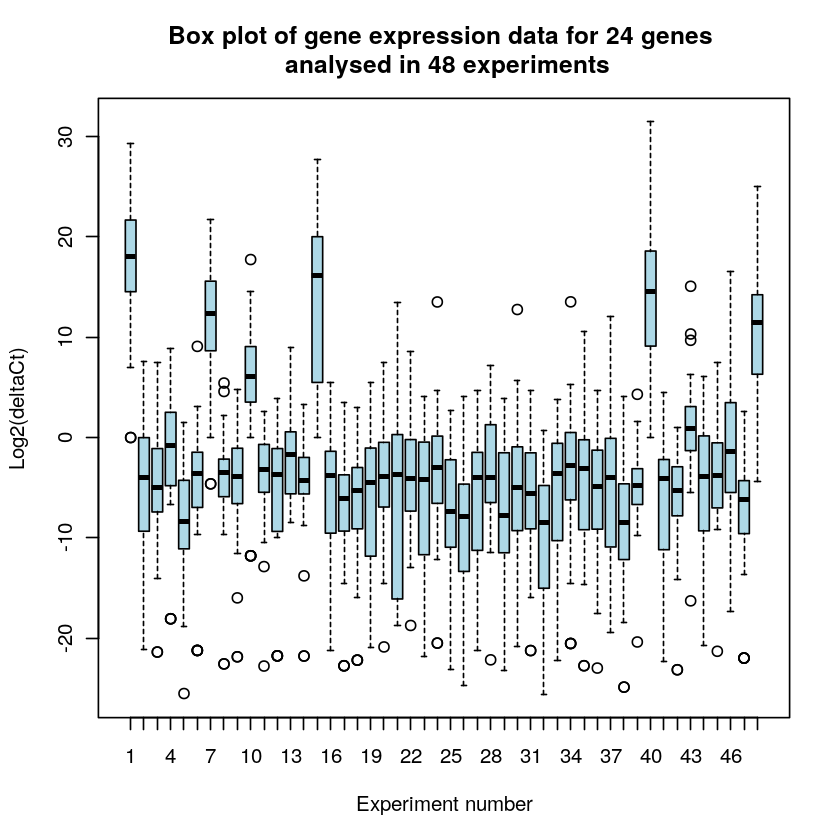

In [45]:
boxplot(Log_trans, col="light blue", bg="gray", ylab="Log2(deltaCt)", xlab="Experiment number",
        main="Box plot of gene expression data for 24 genes \n analysed in 48 experiments")

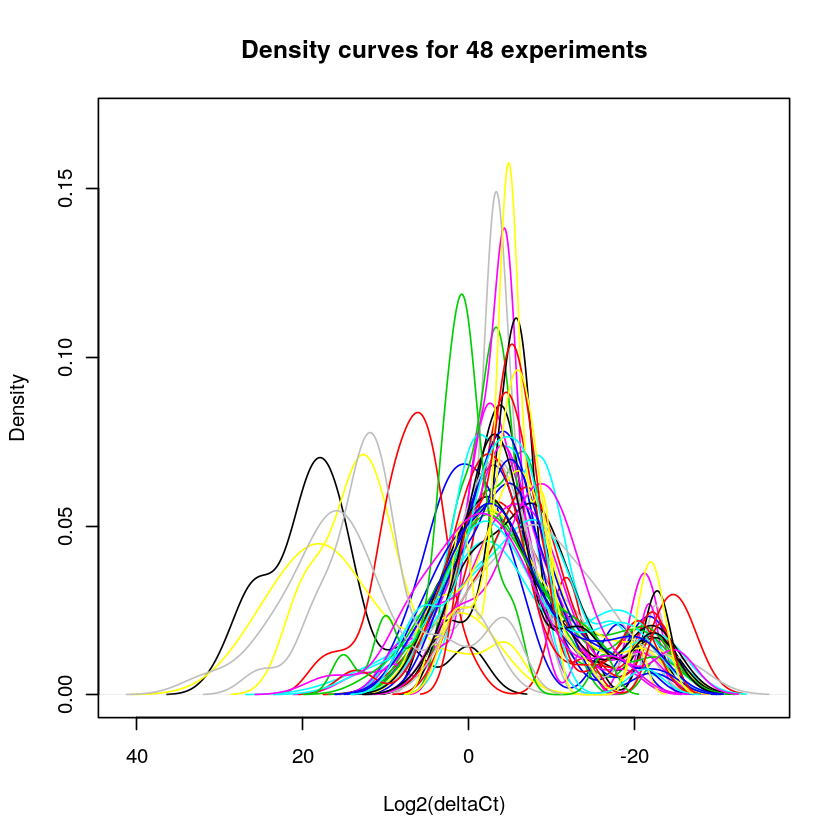

In [47]:
a<-1
plot(density(Log_trans[,1]), col=1, xlim=c(max(Log_trans)+10, min(Log_trans)-10), 
     ylim=c(0, 0.17), main="Density curves for 48 experiments", xlab="Log2(deltaCt)")

for (a in 2:48) {
    lines(density(Log_trans[,a]), col=a)
}


From the box plot, we can notice that about 6 of the experiments had a higher median than the rest. Most of the medians lie within the -10 to 0 range, while these 6 experiments had medians between 5 to 20. This could suggest that the overall expressions of these 24 genes are higher in these 6 experiments due to a functional diference or that they can be artifacts. The cells with similar distribution of gene expression can be cells that are synchronous cells or are functionally similar ( same stage of differentiation). However, it would be worth analysing expression of individual genes to find a more specific correlation.


The density curves (each curve = one experiment) are mostly similar, and the peaks for most experiments lie under 0.10. A few of the curves, however, peak between 0.10 and 0.17; these may correspond to the 6 higher experiments in the box plot. Conclusions could therefore be drawn in a similar manner with density plots.

### Data Normalisation
Normalising the data in an important step in data analysis of gene expression level. There are two types of data normalisation that we will use in this module: scaling normalisation and quantile normalisation. 

** Exercise 11**: Using the single cell data try different type of data normalisation and run the high level data analysis that you implemented in *Exercise 10* on the normalised data. Explain in a markdown cell what you have found. 


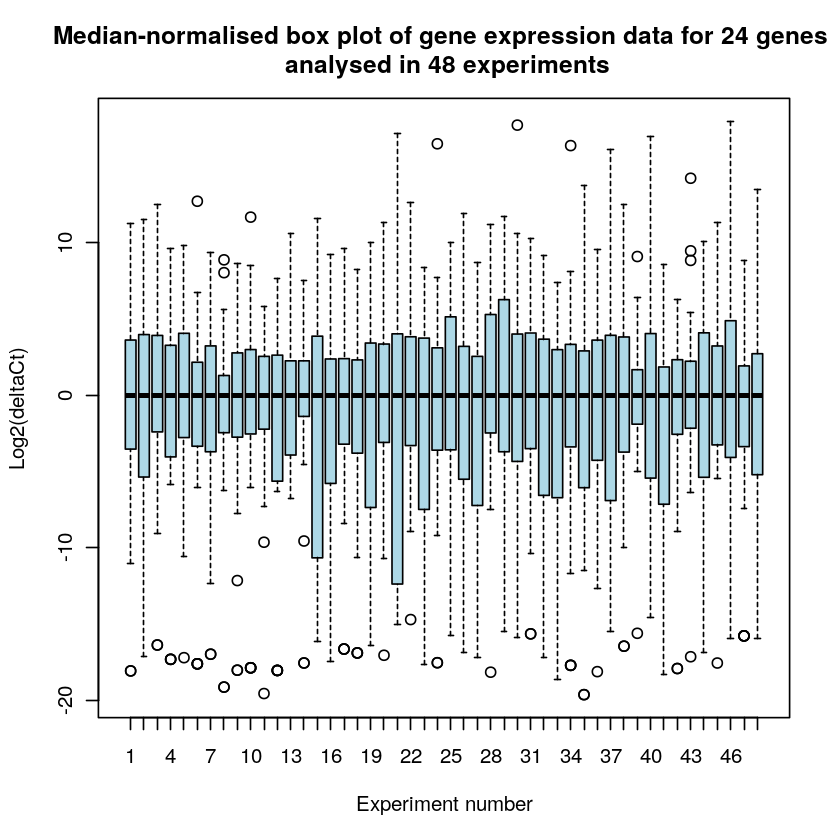

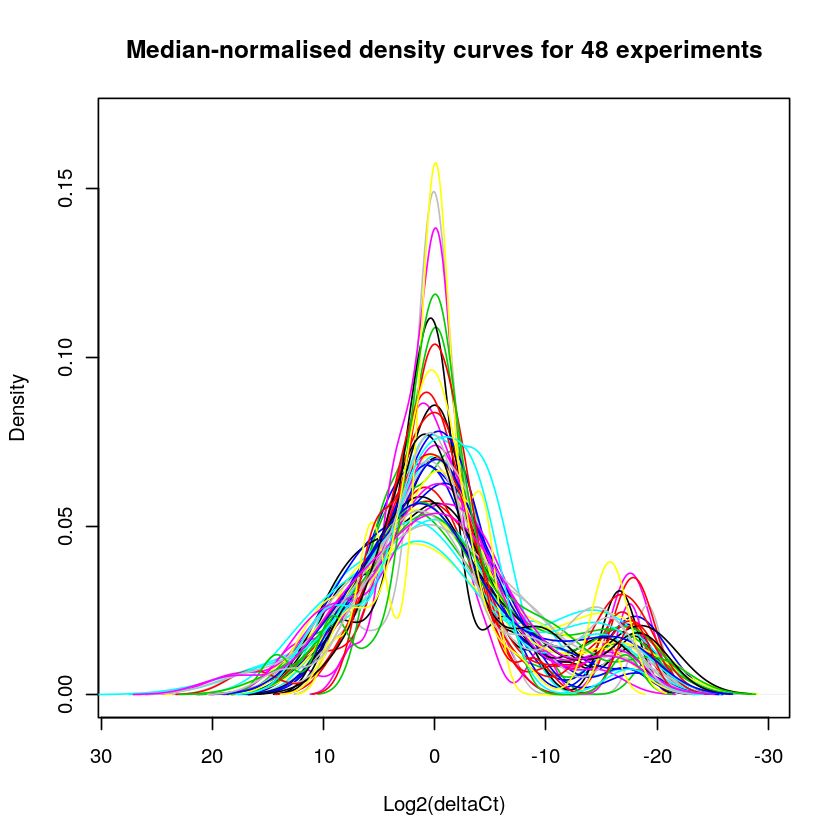

In [49]:
med_att <- apply(Log_trans, 2, median)
scaledData<-sweep(data.matrix(Log_trans), 2, med_att)

boxplot(scaledData, col="light blue", bg="gray", ylab="Log2(deltaCt)", xlab="Experiment number",
        main="Median-normalised box plot of gene expression data for 24 genes \n analysed in 48 experiments")

a=1
plot(density(scaledData[,1]), col=1, xlim=c(max(scaledData)+10, min(scaledData)-10), 
     ylim=c(0, 0.17), main="Median-normalised density curves for 48 experiments", xlab="Log2(deltaCt)")

for (a in 2:48) {
    lines(density(scaledData[,a]), col=a)
}

The normalisation shows an obvious change, the medians of the 48 experiments afre now alligned, giving a better visualisation of density distribution and highlights the peaks.

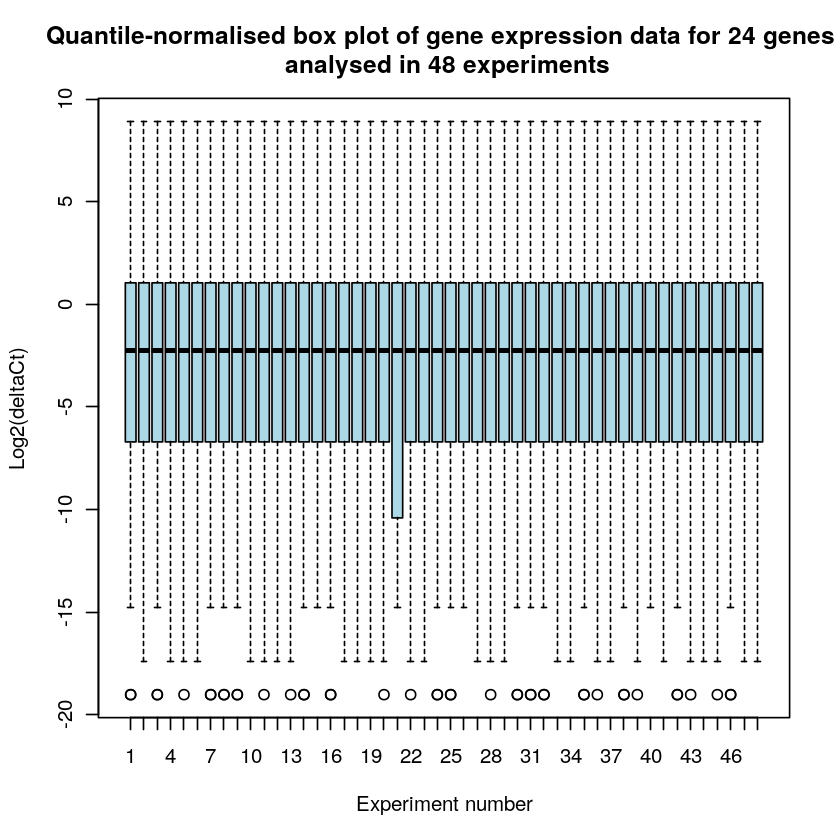

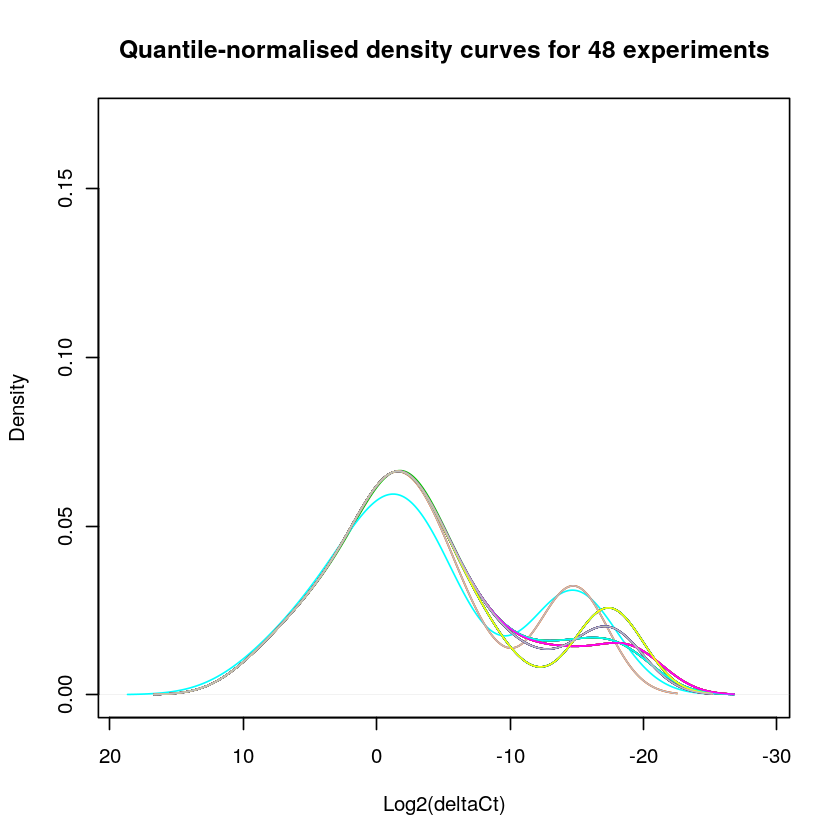

In [50]:
quantile_normalisation <- function(df){
  df_rank <- apply(df,2,rank,ties.method="average")
  df_sorted <- data.frame(apply(df, 2, sort))
  df_mean <- apply(df_sorted, 1, mean)
   
  index_to_mean <- function(my_index, my_mean){
    return(my_mean[my_index])
  }
   
  df_final <- apply(df_rank, 2, index_to_mean, my_mean=df_mean)
  rownames(df_final) <- rownames(df)
  return(df_final)
}

scaledData2<-quantile_normalisation(Log_trans)

boxplot(scaledData2, col="light blue", bg="gray", ylab="Log2(deltaCt)", xlab="Experiment number",
        main="Quantile-normalised box plot of gene expression data for 24 genes \n analysed in 48 experiments")

a<-1
plot(density(scaledData2[,1]), col=1, xlim=c(max(scaledData2)+10, min(scaledData2)-10), 
     ylim=c(0, 0.17), main="Quantile-normalised density curves for 48 experiments", xlab="Log2(deltaCt)")

for (a in 2:48) {
    lines(density(scaledData2[,a]), col=a)
}

The boxplot show the radical effect that the quantile normalisation has had on the data. The experiments have the same quantiles and medians are alligned. However, this normalisation makes it difficult to visualise the difference in data and we loose the peaks that we had noticed above. We can therefore conclude that this normalisation highlits significant changes when data we are analysing has strong expression signals. In tjis case it flattens too much the tails and we loose possible differences that are here only expressed a low signal. The scaling normalisation appears to be more appropriate. 